In [1]:
#Load Data
import pandas as pd
import numpy as np
import os 
#a_food, b_cloth, c_education, d_store, e_lifeservice, 
#f_cafe, g_accommodation, h_leisure, i_estaet
file_list=['a_food','b_cloth','c_education','d_store','e_lifeservice','f_cafe','g_accommodation','h_leisure','i_estate']

dir_name=os.getcwd()

x_data=[]
y_data=[]
#토픽별로 20000개씩 추출
#label value : food-0, cloth-1, education-2,.... estate-8
for i in range(0,len(file_list)) :
  file_name=dir_name+'/'+file_list[i]+'.csv'
  data=pd.read_csv(file_name,header=None)
  print(data.shape)
  for j in range(0,2000) :
    x_data.append(data[0][j])
    y_data.append(i)

x_data=np.array(x_data)
y_data=np.array(y_data)
print(x_data.shape)
print(y_data.shape)  


(8375, 1)
(8381, 1)
(2915, 1)
(7972, 1)
(6639, 1)
(4274, 1)
(3784, 1)
(2598, 1)
(4790, 1)
(18000,)
(18000,)


In [2]:
#Pre-processing 
#문장 토큰화, 데이터 패딩, 임베딩(단어->정수값부여->임베딩층통과->벡터화)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

#문장 토큰화
t=Tokenizer()
t.fit_on_texts(x_data)
vocab_size=len(t.word_index)+1

print(vocab_size) 

#정수 인코딩
x_encoded=t.texts_to_sequences(x_data)
print(x_encoded[0:5])
max_len=max(len(i) for i in x_encoded) 
print(max_len) #제일 긴 문장 추출, 패딩에 사용 -- 20

#모든 문장을 패딩 (길이 통일), 후에 모델 학습시 사용
x_encoded=pad_sequences(x_encoded,maxlen=max_len,padding='post')
print(x_encoded[0:5])



16216
[[23, 498], [5830, 19, 38, 1, 41, 364, 853, 1], [3663, 415, 46, 5831, 853, 723, 18], [3663, 2076, 946, 671, 193, 1729, 127, 1459], [5832, 5833, 557, 365]]
30
[[  23  498    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [5830   19   38    1   41  364  853    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [3663  415   46 5831  853  723   18    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [3663 2076  946  671  193 1729  127 1459    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [5832 5833  557  365    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]]


In [3]:
#Use Pre-trained Embedding Matrix - Word2Vec https://github.com/Kyubyong/wordvectors
import gensim
import numpy as np

def get_vector(word) :
  if word in kor_word2vec_model :
    return kor_word2vec_model[word]
  else :
    return None

kor_word2vec_model = gensim.models.Word2Vec.load(dir_name+'/ko.bin')
result = kor_word2vec_model.wv.most_similar("배고픔") #model test
print(result) 
print(kor_word2vec_model) #vector_size=200

embedding_dim=200
embedding_matrix=np.zeros((vocab_size,embedding_dim))
print(np.shape(embedding_matrix))
for word, i in t.word_index.items():
  temp=get_vector(word)
  if temp is not None :
    embedding_matrix[i]=temp; 

print(embedding_matrix[5])
print(embedding_matrix.shape)



[('굶주림', 0.7315763235092163), ('갈증', 0.6932728290557861), ('우울증', 0.6545943021774292), ('두통', 0.6426253318786621), ('슬픔', 0.6376044154167175), ('고통', 0.6278344988822937), ('죄책감', 0.6167707443237305), ('고독', 0.6096115708351135), ('통증', 0.6073928475379944), ('가뭄', 0.5912175178527832)]
Word2Vec(vocab=30185, size=200, alpha=0.025)
(16216, 200)
[ 0.87955445  3.51403809 -3.24564695 -0.44390556  1.65877819  2.79138994
 -2.38859749 -1.69410491 -4.66581869 -1.40278232  0.52966899  2.38166356
  1.86097968 -0.2121693   1.29480684  1.340168    1.33980846  0.65593433
 -3.97182965 -1.87287378 -2.31968427 -0.36057377  1.96739149  2.63297033
  3.62644196 -2.02101588 -2.54353046 -3.30448771 -1.73401546  0.10235422
  2.16407609 -0.26688221 -1.28560567 -1.07995558 -0.43422294 -1.18709815
  2.49914885 -2.92724586  2.0472517   3.16466165 -1.0194726  -0.43097895
  0.96997708  2.60468745  0.87658358 -0.95602894  2.89103341 -0.47456264
  0.29335284 -3.18679857 -1.16479719  0.40571555 -2.49110079 -0.73088485
 

<ipython-input-3-03d4e58f47a7>:6: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if word in kor_word2vec_model :
<ipython-input-3-03d4e58f47a7>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  return kor_word2vec_model[word]


In [4]:
#Split Data
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
#학습7 검증3

categorical_y = to_categorical(y_data, 9)

x_train, x_test, y_train, y_test = train_test_split(x_encoded,categorical_y,
                                                    test_size=0.3,stratify=y_data,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12600, 30)
(5400, 30)
(12600, 9)
(5400, 9)


In [5]:
#GPU 셋팅
import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
session=tf.compat.v1.Session(config=config)

config = tf.compat.v1.ConfigProto() 
config.gpu_options.per_process_gpu_memory_fraction = 0.3 
session=tf.compat.v1.Session(config=config)



Bi-LSTM NetWork
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 200)      3243200     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 30, 200)      3243200     input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 30, 200)      0           embedding[0][0]                  
______________________________________________________________________________

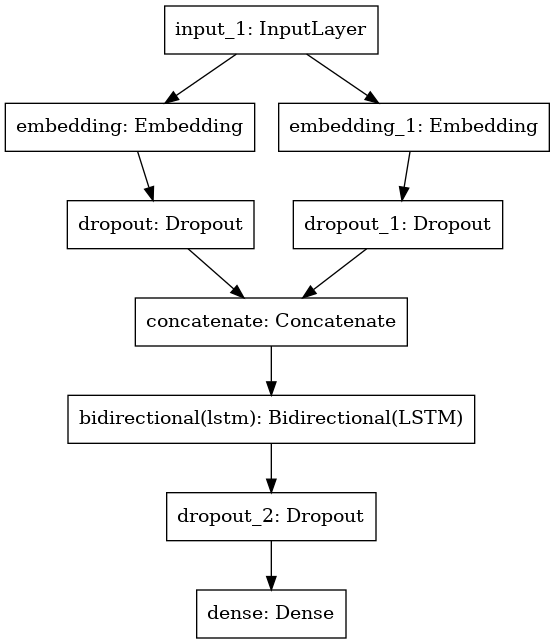

In [6]:
#Bi-LSTM Network
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import concatenate, Embedding, Input, LSTM, Dropout, Bidirectional,Dense
import keras.utils as utils
#model_input=Input(shape=(max_len,))
#embedding_layer=Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],
#                          input_length=max_len,trainable=False)(model_input)

main_input=Input(shape=(30,))
non_static_channel=Embedding(vocab_size,embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=True)(main_input)
non_static_channel=Dropout(0.5)(non_static_channel)

static_channel=Embedding(vocab_size,embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False)(main_input)
static_channel=Dropout(0.5)(static_channel)

two_channel=concatenate([non_static_channel,static_channel])

bi_lstm=Bidirectional(LSTM(embedding_dim,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False))(two_channel)

drop_out=Dropout(0.5)(bi_lstm)

dc=Dense(9,activation='softmax')(drop_out)

model=Model(inputs=main_input,outputs=dc)


model.compile(optimizer='adam',                        
              loss='categorical_crossentropy',  #sparse_categorical_crossentropy
              metrics=['accuracy']) 

print('Bi-LSTM NetWork')
model.summary()
utils.plot_model(model)


In [7]:
#Excute Bi-LSTM Model
epoch_cnt=20

history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=epoch_cnt,
          validation_data = (x_test, y_test))

Epoch 1/20
394/394 [==============================] - 10s 17ms/step - loss: 2.0487 - accuracy: 0.2361 - val_loss: 1.6710 - val_accuracy: 0.4300
Epoch 2/20
394/394 [==============================] - 6s 16ms/step - loss: 1.5768 - accuracy: 0.4616 - val_loss: 1.3568 - val_accuracy: 0.5567
Epoch 3/20
394/394 [==============================] - 7s 17ms/step - loss: 1.1073 - accuracy: 0.6449 - val_loss: 1.1501 - val_accuracy: 0.6224
Epoch 4/20
394/394 [==============================] - 7s 17ms/step - loss: 0.6854 - accuracy: 0.7910 - val_loss: 1.1165 - val_accuracy: 0.6459
Epoch 5/20
394/394 [==============================] - 7s 17ms/step - loss: 0.4624 - accuracy: 0.8635 - val_loss: 1.1020 - val_accuracy: 0.6593
Epoch 6/20
394/394 [==============================] - 6s 16ms/step - loss: 0.3430 - accuracy: 0.8934 - val_loss: 1.1495 - val_accuracy: 0.6531
Epoch 7/20
394/394 [==============================] - 6s 16ms/step - loss: 0.2676 - accuracy: 0.9151 - val_loss: 1.1679 - val_accuracy: 0.657

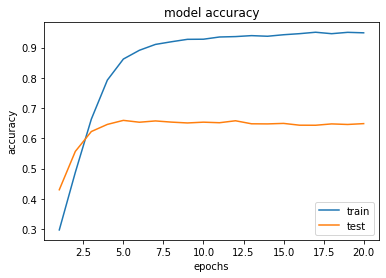

In [8]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()